# Feature Extraction

## One Ellipse
In 2D space with 2 features, represent instances as dots.  
An ellipse encircles most of the data.  
Center = centroid = data mean.  
$\Sigma$ = covariance matrix.  
$\lambda_i$ = eigenvalues of covariance matrix.  
Each ellipse radius has length $\sqrt(\lambda_i)$.  
Each ellipse diameter has length $2\sqrt(\lambda_i)$.  

### Scatter matrix
Scatter matrix = $\sum[(\mu-x_k)(\mu-x_k)^T]$.  
Scatter matrix = outer product (u-x) * (u-x).  
For d dimensional data, scatter matrix size is (d x d).   
The (scatter matrix)/n is the maximum likelihood estimate of the covariance matrix, assuming normality.  

Note similarity to covariation matrix.  
cov(X,Y) = $\sigma(X,Y) = (1/n)\sum_1^n[(\mu_{x}-x)(\mu_{y}-y)^T]$  

Matrix M is positive definite if $z^TMz$ is positive for all real column vectors z.  
Matrix M is positive semi-definite if $z^TMz$ is non-negative for all real column vectors z.  
The scatter matrix is positive semi-definite.   

See wikipedia [scatter matrix](https://en.wikipedia.org/wiki/Scatter_matrix)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [2]:
def scatter_matrix(X):
    """For 100 points in 2D space, X has size=(100,2)"""
    instances = X.shape[0]
    features = X.shape[1]
    means = np.mean(X)  # vector of feature means
    sm = np.zeros( (features,features) )
    for i in range(instances):
        deviation = means-X[i] # vector of feature deviations
        outer_product = np.outer(deviation,deviation)
        sm += outer_product
    return sm
        

Scatter matrix
[[24418.53 -1059.49]
 [-1059.49 22326.49]]
ML estimate of Covariance matrix
[[244.1853 -10.5949]
 [-10.5949 223.2649]]
Numpy estimate of Covariance matrix
[[246.32363636 -10.37373737]
 [-10.37373737 225.19191919]]


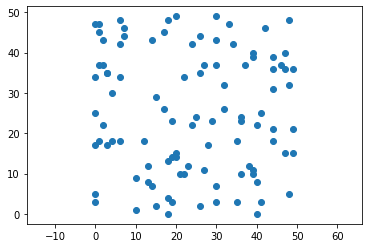

In [3]:
# One hundred uniformly scattered points.
N = 100
x = np.random.randint(0, 50, N)
y = np.random.randint(0, 50, N)
xy = np.asarray(list(zip(x, y)))  # N rows of (x,y)
sm = scatter_matrix(xy)
print('Scatter matrix')
print(sm)
mlcov = sm/N
print('ML estimate of Covariance matrix')
print(mlcov)
print('Numpy estimate of Covariance matrix')
obs = np.array( [x,y] )   # row of x values, row of values
print(np.cov(obs))

plt.scatter(x, y)
plt.axis('equal')    # uniform aspect ratio, not same coords
plt.show()

Scatter matrix
[[4571.45378417 -121.26588712]
 [-121.26588712  199.94651784]]
ML estimate of Covariance matrix
[[22.85726892 -0.60632944]
 [-0.60632944  0.99973259]]
Numpy estimate of Covariance matrix
[[22.92633125 -0.563578  ]
 [-0.563578    0.95895805]]


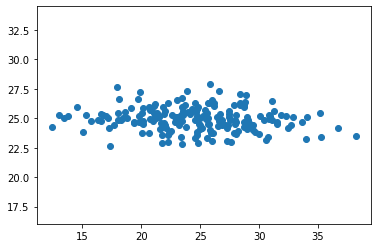

In [4]:
# Multivariate gaussian.
N = 200
mu = 25
sigma_x = 5
sigma_y = 1
x = np.random.normal(mu, sigma_x, N)
y = np.random.normal(mu, sigma_y, N)
xy = np.asarray(list(zip(x, y)))  # N rows of (x,y)
sm = scatter_matrix(xy)
print('Scatter matrix')
print(sm)
mlcov = sm/N
print('ML estimate of Covariance matrix')
print(mlcov)
print('Numpy estimate of Covariance matrix')
obs = np.array( [x,y] )   # row of x values, row of values
print(np.cov(obs))

plt.scatter(x, y)
plt.axis('equal')    # uniform aspect ratio, not same coords
plt.show()

## Slide 7 from Lectures 5-6
Slide 7 shows a matlab script using 1=male=blue, 2=female=red.
N=150.
The means are M1=(170,75), M2=(160,50).
The covariance matrices are E1= 150 15 and 120 20, E2= 100 10 and 70 30;
using E for Sigma.
The eigen decomposition is computed with matlab's [P,A]=eig(),
where P has eigenvectors and A has eigenvalues.
To generate (x,y) data points, use random normal numbers y=randn(2,N);
this y should be r as it has nothing to do with the y-axis.
Each data point x is a 2-feature vector computed from x=P1 * sqrt(A1) * y + M1.
The hint on the next slide says to use E=PAP, the eigen decomposition.
We'll repeat the exercise with numpy.

In [5]:
N=150
mu = (170,75)
cov = np.array([[150,15],[120,20]])  ## assume the matlab code used row vectors, like numpy
print('mean\n',mu)
print('covariance\n',cov)

mean
 (170, 75)
covariance
 [[150  15]
 [120  20]]


With numpy, we could simulate a population directly with this info.  
But we must use high tolerance and get approximate values
because numpy says the covariance matrix is not positive-semidefinite.

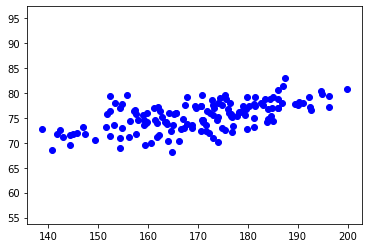

In [6]:
X = np.random.multivariate_normal(mu,cov,size=N,tol=1)
x = X[:,0]
y = X[:,1]
plt.scatter(x, y, color='blue')
plt.axis('equal')   
plt.show()

But instead, we'll simulate a population using the eigens.  
It is rather silly in this case since we'll compute the eigens from the covariance.  

In [7]:
# Matlab returnes [eigenvecors,eigenvalues]. Numpy does the opposite.
eigenvalues,P = np.linalg.eig(cov)
Pinv = np.linalg.inv(P)
A = eigenvalues * np.identity(2)   # 2x2 diagonal matrix
print('eigenvectors P\n', P)
print('diagonal eigenvalues A\n', A)
print('1/P\n', Pinv)
print('As a test, reconstruct cov = PAP\n', P.dot(A.dot(Pinv)))

eigenvectors P
 [[ 0.7651802  -0.10459703]
 [ 0.64381617  0.99451469]]
diagonal eigenvalues A
 [[162.62087348   0.        ]
 [  0.           7.37912652]]
1/P
 [[ 1.20063458  0.12627548]
 [-0.77725142  0.92376897]]
As a test, reconstruct cov = PAP
 [[150.  15.]
 [120.  20.]]


Generate random data points using the eigens

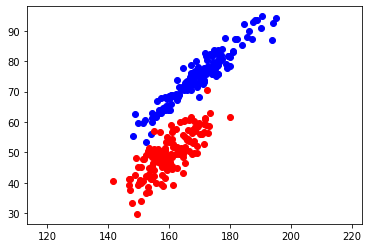

In [8]:
def make_data(N,mean,cov):
    eigenvalues,P = np.linalg.eig(cov)
    Pinv = np.linalg.inv(P)
    A = eigenvalues * np.identity(2)   # 2x2 diagonal matrix
    s = np.sqrt(A)
    r=np.zeros(2)
    X = np.zeros ( (N,2) )
    for i in range(N):
        r = np.random.standard_normal(2)
        x = P.dot(s).dot(r) + mu
        X[i] = x
    x = X[:,0]
    y = X[:,1]
    return x,y

mu = (170,75)
cov = np.array([[150,15],[120,20]])  ## assume the matlab code used row vectors, like numpy
x,y=make_data(N,mu,cov)
plt.scatter(x, y, color='blue')
mu = (160,50)
cov = np.array([[100,10],[70,30]])  ## assume the matlab code used row vectors, like numpy
x,y=make_data(N,mu,cov)
plt.scatter(x, y, color='red')

plt.axis('equal')   
plt.show()

## Slide 8 from Lectures 5-6
Slide 8 gives a similar plot that we need to reverse engineer.  
Make two distributions and plot them in the same figure.   
First, we'll do ith with numpy by estimating the mean and variance by eyeball.

Blue covariance
 [[426.71009692   1.91653071]
 [  1.91653071  15.74127419]]
Blue eigenvectors
 [[ 0.99998913 -0.00466329]
 [ 0.00466329  0.99998913]]
Red covariance prior to rotation -- almost none!
 [[  3.67571763   2.77795946]
 [  2.77795946 708.99299103]]
Red eigenvectors
 [[-0.99999224 -0.0039385 ]
 [ 0.0039385  -0.99999224]]
Red covariance after rotation -- covariance close to the variance
 [[ 353.55639487 -352.6586367 ]
 [-352.6586367   359.11231379]]
Red eigenvectors
 [[-0.70988624  0.70431635]
 [-0.70431635 -0.70988624]]


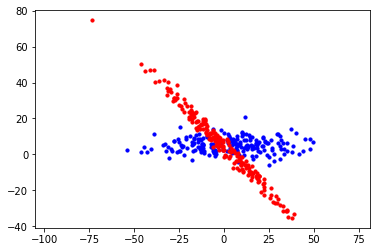

In [9]:
# Blue
N = 200
markersize = 10
mu_x = 3
mu_y = 5
radius_1 = 40 
radius_2 = 8
sigma_x = radius_1/2  # so 95% of points in 2 stdevs = +/- 40
sigma_y = radius_2/2
blue_x = np.random.normal(mu_x, sigma_x, N)
blue_y = np.random.normal(mu_y, sigma_y, N)
obs = np.array( [blue_x,blue_y] )   # row of x values, row of values
cov = np.cov(obs)
print('Blue covariance\n',cov)
eigenvalues,eigenvectors = np.linalg.eig(cov)
print('Blue eigenvectors\n',eigenvectors)
plt.scatter(blue_x, blue_y, color='blue', s=markersize)

# Red
radius_1 = 4
radius_2 = 50
sigma_x = radius_1/2   # so 95% of points in 2 stdevs = +/- 4
sigma_y = radius_2/2
red_x = np.random.normal(mu_x, sigma_x, N)
red_y = np.random.normal(mu_y, sigma_y, N)
obs = np.array( [red_x,red_y] )   # row of x values, row of values
cov = np.cov(obs)
print('Red covariance prior to rotation -- almost none!\n',cov)
eigenvalues,eigenvectors = np.linalg.eig(cov)
print('Red eigenvectors\n',eigenvectors)

# Red rotated
degrees = -45
rad = np.radians(degrees)
rotation_matrix = [[np.cos(rad),0-np.sin(rad)],[np.sin(rad),np.cos(rad)]]
xy = np.asarray(list(zip(red_x, red_y)))  # N rows of (x,y)
rotated = xy.dot(rotation_matrix)
rot_x,rot_y = zip(*rotated)
obs = np.array( [rot_x,rot_y] )   # row of x values, row of values
cov = np.cov(obs)
print('Red covariance after rotation -- covariance close to the variance\n',cov)
eigenvalues,eigenvectors = np.linalg.eig(cov)
print('Red eigenvectors\n',eigenvectors)
      
plt.scatter(rot_x, rot_y, color='red', s=markersize)
plt.axis('equal')   
plt.show()

Preparing for the next steps, we'll show that we could
combine both both distributions into one data structure and one figure.

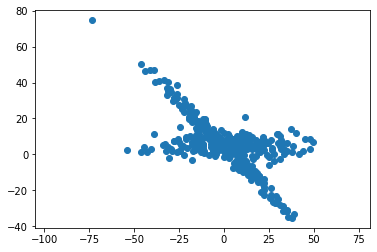

In [10]:
x = np.concatenate( (blue_x,rot_x) )
y = np.concatenate( (blue_y,rot_y) )
plt.scatter(x, y,)
plt.axis('equal')    
plt.show()

Next we'll generate the data from the eigens.  
These are easier to guess than mean and covariance.   
With an ellipsoid distribution,
each eigenvalue is the square of a radial axis.

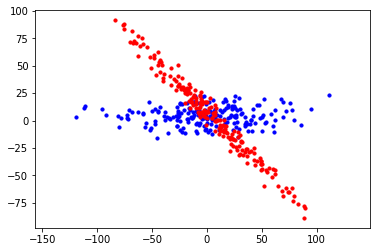

In [13]:
def make_points(N,mu,eigenvalues,eigenvectors):
    P = np.array(eigenvectors)
    Pinv = np.linalg.inv(P)
    A = eigenvalues * np.identity(2)   # 2x2 diagonal matrix
    cov = P.dot(A.dot(Pinv))    
    X = np.random.multivariate_normal(mu,cov,size=N,tol=1)
    x = X[:,0]
    y = X[:,1]
    return x,y

N = 200
mu = (3,5)
markersize = 10

big_radius=40
small_radius=8
eigenvalues = (big_radius**2, small_radius**2)
eigenvectors = [[1,0],[0,1]]  # guess for horizontal line
x,y=make_points(N,mu,eigenvalues,eigenvectors)
plt.scatter(x, y, color='blue',s=markersize)

big_radius=50
small_radius=4
eigenvalues = (big_radius**2, small_radius**2)
eigenvectors = [[1,1],[-1,1]]  # guess for tilted line
x,y=make_points(N,mu,eigenvalues,eigenvectors)
plt.scatter(x, y, color='red',s=markersize)

plt.axis('equal')   
plt.show()

My points are more spread out than the ones on the slide,
but remember I had to use the numpy random number generator
with wide tolerance because numpy said the covariance was not positive-semidefinite.